In [32]:
import numpy as np
import pandas as pd
import pickle
import os

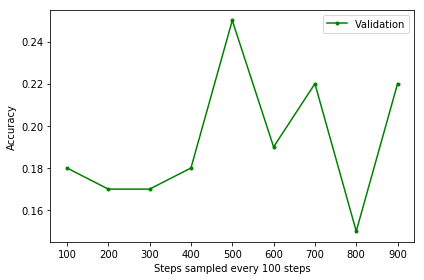

In [5]:
import subprocess
import os,sys
import matplotlib.pyplot as plt
max = 0
val_accuracy = []
filename= "neeg_logs"
# grep "INFO.*eval_accuracy =" triple_logs | awk -F "loss = " '{print $2}'

grep = subprocess.Popen(
  ["grep", "INFO.*eval_accuracy =" ,filename],
  stdout=subprocess.PIPE,
)

awk = subprocess.Popen(
  ["awk" ,"-F" ,"eval_accuracy = ", "{print $2}"],
  stdin=grep.stdout,
  stdout=subprocess.PIPE,
)
awk2 = subprocess.Popen(
  ["awk" ,"-F" ,",", "{print $1}"],
  stdin=awk.stdout,
  stdout=subprocess.PIPE,
)
for line in awk2.stdout:
  val_accuracy.append(float(line.decode('utf-8').replace('\n','')))

x = list(range(1, len(val_accuracy)+1))
plt.plot([100*i for i in x], val_accuracy, label="Validation", marker=".", color='g')
plt.xlabel('Steps sampled every 100 steps')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend()
plt.show()


In [46]:
with open('triple1000_data.pkl', 'rb') as f:
    triple_df = pickle.load(f)
with open('sentence1000_data.pkl', 'rb') as f:
    sentence_df = pickle.load(f)

In [47]:
sentence_df.loc[(~triple_df.correct_pred) &  (sentence_df.correct_pred)]

,predictions,dataset,pred_label,gt_label,correct_pred
44,"{'probabilities': [[-12.388426, -9.1874275, -1...","{'entity': 'Yigal Amir', 'correct': 3, 'senten...",3,3,True
52,"{'probabilities': [[-9.118824, -5.6509633, -10...","{'entity': 'Ecevit', 'correct': 2, 'sentences'...",2,2,True
95,"{'probabilities': [[-8.40944, -5.453362, -9.81...","{'entity': 'Waddell', 'correct': 3, 'sentences...",3,3,True
155,"{'probabilities': [[-9.971258, -3.9684496, -4....","{'entity': 'Kaufman', 'correct': 2, 'sentences...",2,2,True
159,"{'probabilities': [[-7.1605315, -13.009034, -0...","{'entity': 'we', 'correct': 1, 'sentences': ['...",1,1,True
172,"{'probabilities': [[-10.321208, -4.689179, -7....","{'entity': 'We', 'correct': 3, 'sentences': ['...",3,3,True
193,"{'probabilities': [[-10.019813, -5.6865163, -5...","{'entity': 'Ms. Yuskavage', 'correct': 3, 'sen...",3,3,True
221,"{'probabilities': [[-9.015293, -0.43514585, -1...","{'entity': 'Elway', 'correct': 0, 'sentences':...",0,0,True
274,"{'probabilities': [[-11.741661, -0.0015638752,...","{'entity': 'Republican senators', 'correct': 0...",0,0,True
288,"{'probabilities': [[-8.850975, -0.36797538, -6...","{'entity': 'us', 'correct': 0, 'sentences': ['...",0,0,True


In [48]:
triple_df.loc[(~triple_df.correct_pred) &  (sentence_df.correct_pred)]

,predictions,dataset,pred_label,gt_label,correct_pred
44,"{'probabilities': [[-8.902309, -0.410292, -10....","{'entity': 'Yigal Amir', 'correct': 3, 'senten...",0,3,False
52,"{'probabilities': [[-9.959668, -14.986195, -15...","{'entity': 'Ecevit', 'correct': 2, 'sentences'...",3,2,False
95,"{'probabilities': [[-9.642509, -0.1741595, -5....","{'entity': 'Waddell', 'correct': 3, 'sentences...",0,3,False
155,"{'probabilities': [[-10.139052, -0.06648731, -...","{'entity': 'Kaufman', 'correct': 2, 'sentences...",0,2,False
159,"{'probabilities': [[-9.149234, -9.744007, -1.9...","{'entity': 'we', 'correct': 1, 'sentences': ['...",2,1,False
172,"{'probabilities': [[-8.8993435, -3.6649694, -4...","{'entity': 'We', 'correct': 3, 'sentences': ['...",2,3,False
193,"{'probabilities': [[-8.357175, -0.43781182, -2...","{'entity': 'Ms. Yuskavage', 'correct': 3, 'sen...",0,3,False
221,"{'probabilities': [[-9.53872, -1.3177828, -15....","{'entity': 'Elway', 'correct': 0, 'sentences':...",3,0,False
274,"{'probabilities': [[-7.717028, -1.2086842, -0....","{'entity': 'Republican senators', 'correct': 0...",1,0,False
288,"{'probabilities': [[-12.07327, -6.0136495, -12...","{'entity': 'us', 'correct': 0, 'sentences': ['...",2,0,False


In [49]:
triple_df.loc[(~sentence_df.correct_pred) &  (triple_df.correct_pred)]

,predictions,dataset,pred_label,gt_label,correct_pred
0,"{'probabilities': [[-10.534253, -0.00013100242...","{'entity': 'Bush', 'correct': 0, 'sentences': ...",0,0,True
34,"{'probabilities': [[-11.915886, -14.836338, -4...",{'entity': 'you follow Dr. Brill's Patented Sy...,2,2,True
55,"{'probabilities': [[-10.24644, -3.4088082, -5....","{'entity': 'the United States Senate', 'correc...",2,2,True
110,"{'probabilities': [[-6.766703, -3.7706742, -2....","{'entity': 'Jamal Anderson', 'correct': 2, 'se...",2,2,True
144,"{'probabilities': [[-13.371989, -9.933456, -0....","{'entity': 'St. John', 'correct': 1, 'sentence...",1,1,True
148,"{'probabilities': [[-9.292459, -14.798268, -0....","{'entity': ' President Clinton', 'correct': 2,...",2,2,True
149,"{'probabilities': [[-10.076131, -0.085746296, ...","{'entity': 'Mom', 'correct': 0, 'sentences': [...",0,0,True
152,"{'probabilities': [[-8.447663, -3.6446478, -0....","{'entity': 'Denver', 'correct': 1, 'sentences'...",1,1,True
168,"{'probabilities': [[-6.8094153, -1.32741, -1.0...","{'entity': ' PHOENIX - John McCain', 'correct'...",1,1,True
180,"{'probabilities': [[-10.244483, -5.659, -5.900...","{'entity': 'the reward', 'correct': 2, 'senten...",2,2,True


In [50]:
sentence_df.loc[(~sentence_df.correct_pred) &  (triple_df.correct_pred)]

,predictions,dataset,pred_label,gt_label,correct_pred
0,"{'probabilities': [[-8.706815, -2.84308, -0.06...","{'entity': 'Bush', 'correct': 0, 'sentences': ...",1,0,False
34,"{'probabilities': [[-8.876053, -5.0352664, -0....",{'entity': 'you follow Dr. Brill's Patented Sy...,1,2,False
55,"{'probabilities': [[-9.197079, -0.2612041, -4....","{'entity': 'the United States Senate', 'correc...",0,2,False
110,"{'probabilities': [[-6.5401025, -1.3968542, -0...","{'entity': 'Jamal Anderson', 'correct': 2, 'se...",1,2,False
144,"{'probabilities': [[-8.157574, -1.241031, -6.7...","{'entity': 'St. John', 'correct': 1, 'sentence...",2,1,False
148,"{'probabilities': [[-8.378637, -12.525649, -0....","{'entity': ' President Clinton', 'correct': 2,...",1,2,False
149,"{'probabilities': [[-8.475501, -0.84643745, -7...","{'entity': 'Mom', 'correct': 0, 'sentences': [...",3,0,False
152,"{'probabilities': [[-9.1833725, -0.09604924, -...","{'entity': 'Denver', 'correct': 1, 'sentences'...",0,1,False
168,"{'probabilities': [[-7.883684, -1.4230741, -1....","{'entity': ' PHOENIX - John McCain', 'correct'...",2,1,False
180,"{'probabilities': [[-8.088906, -2.2927613, -2....","{'entity': 'the reward', 'correct': 2, 'senten...",3,2,False


In [61]:
for d in triple_df.loc[(~triple_df.correct_pred) &  (sentence_df.correct_pred)].dataset:
    if len(' '.join(d['sentences']).split(' ')) > 60:
        continue
    d['sentences'] = [s.replace('\n', ' ').strip() for s in d['sentences']]
    print(d['sentences'],"\n")
    print(d['triples'],"\n")
    print(d['candidates'],"\n")
    print("Entity:", d['entity'])
    print("Corect:", d['correct'], "\n\n")

["So will we have to wait until New Year's Day to find out which camp was right?", 'The calendar is dotted with dates that will give us a good indication of where we stand with Y2K.', "As we pass these milestones, we'll get the information we need to determine whether to start hoarding."] 

[(None, 'have', 'to wait'), ('that', 'will give', None), (None, 'pass', 'milestones')] 

[('one such pressure point', 'found', None), (None, 'passed', 'pressure point'), (None, 'Filed', 'run'), (None, 'start stockpiling', 'Y2K problems'), ('March', 'found', None)] 

Entity: we
Corect: 1 


['We need to be smart.', "If we don't take the lead in stopping nuclear testing and reducing our own arsenal, we'll have no credibility demanding that India and Pakistan do it.", 'So you give us the tools we need to fight proliferation'] 

[(None, 'need', 'to be'), (None, "n't\ntake", 'lead'), ('you', 'give', None)] 

[(None, 'have', 'all nuclear\ntesting _'), ('the Russians _', 'are heading', None), (None, 'is', 